## Data Preparation

### Importing Libraries

In [1]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

import sklearn as skl
import time as t
from IPython.display import display, clear_output

import json
import pickle

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.2


### Importing Dataset

In [2]:
ppdf = pd.read_csv("/work/Run_For_Life/dataset_halfSecondWindow.csv", index_col=0)

In [3]:
ppdf.head()

id  time  activityrecognition#0  activityrecognition#1  \
0  156661   3.0                    NaN                   62.0   
1  156662   4.0                    NaN                   62.0   
2  156663   5.0                    NaN                   62.0   
3  156664   6.0                    NaN                   62.0   
4  156665   7.0                    NaN                   62.0   

   android.sensor.accelerometer#mean  android.sensor.accelerometer#min  \
0                          10.053802                          4.328630   
1                          10.687402                          6.373194   
2                          11.816800                          4.817410   
3                           9.401312                          6.124588   
4                          10.389851                          5.313790   

   android.sensor.accelerometer#max  android.sensor.accelerometer#std  \
0                         14.419712                          2.359507   
1                         16.329818                          2.912315   
2                         16.854629                          3.199759   
3                         12.230792                          1.572354   
4                         38.533453                          5.426978   

   android.sensor.game_rotation_vector#mean  \
0                                  0.629076   
1                                  0.577839   
2                                  0.651511   
3                                  0.713226   
4                                  0.707375   

   android.sensor.game_rotation_vector#min  ...  sound#mean  sound#min  \
0                                 0.436463  ...         NaN        NaN   
1                                 0.376494  ...         NaN        NaN   
2                                 0.585485  ...         NaN        NaN   
3                                 0.693072  ...         NaN        NaN   
4                                 0.684707  ...         NaN        NaN   

   sound#max  sound#std  speed#mean  speed#min  speed#max  speed#std  target  \
0        NaN        NaN         NaN        NaN        NaN        NaN     Bus   
1        NaN        NaN         NaN        NaN        NaN        NaN     Bus   
2        NaN        NaN         NaN        NaN        NaN        NaN     Bus   
3        NaN        NaN         NaN        NaN        NaN        NaN     Bus   
4        NaN        NaN         NaN        NaN        NaN        NaN     Bus   

   user  
0   U12  
1   U12  
2   U12  
3   U12  
4   U12  

[5 rows x 70 columns]

### Exploratory Data Analysis

** Creating New Data Set with Necessary Columns **

In [4]:
small_df = ppdf.drop(['android.sensor.light#mean', 
       'android.sensor.light#min',
       'android.sensor.light#max', 
       'android.sensor.light#std',
       'android.sensor.pressure#mean', 
       'android.sensor.pressure#min',
       'android.sensor.pressure#max', 
       'android.sensor.pressure#std',
       #'android.sensor.magnetic_field#mean',
       'android.sensor.magnetic_field#min',
       'android.sensor.magnetic_field#max',
       'android.sensor.magnetic_field#std',
       'android.sensor.magnetic_field_uncalibrated#mean',
       'android.sensor.magnetic_field_uncalibrated#min',
       'android.sensor.magnetic_field_uncalibrated#max',
       'android.sensor.magnetic_field_uncalibrated#std',
       'android.sensor.gravity#mean', 
       'android.sensor.gravity#min',
       'android.sensor.gravity#max', 
       'android.sensor.gravity#std',
       'android.sensor.proximity#mean', 
       'android.sensor.proximity#min',
       'android.sensor.proximity#max', 
       'android.sensor.proximity#std',
       #'android.sensor.rotation_vector#mean',
       'android.sensor.rotation_vector#min',
       'android.sensor.rotation_vector#max',
       'android.sensor.rotation_vector#std',
       'sound#mean', 
       'sound#min', 
       'sound#max', 
       'sound#std',
       'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std',
       'activityrecognition#0',
       'activityrecognition#1',
       'android.sensor.step_counter#std',
       'android.sensor.step_counter#min',
       'android.sensor.step_counter#max',
       'android.sensor.step_counter#mean',
       'speed#std',
       'speed#min',
       'speed#max',
       'speed#mean',
       'android.sensor.linear_acceleration#min',
       'android.sensor.linear_acceleration#std',
       'android.sensor.linear_acceleration#max',
       #'android.sensor.accelerometer#min',
       #'android.sensor.accelerometer#max',
       #'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#max',
       'android.sensor.game_rotation_vector#min',
       'android.sensor.game_rotation_vector#std',
       'android.sensor.orientation#min',
       'android.sensor.orientation#max',
       #'android.sensor.orientation#std',
       'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#max',
       'android.sensor.gyroscope#std',
       #'user',

       'id'],axis=1)

** Checking Statistical Information and Basic Information of Dataset **

In [5]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62585 entries, 0 to 62584
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   time                                      62585 non-null  float64
 1   android.sensor.accelerometer#mean         62585 non-null  float64
 2   android.sensor.accelerometer#min          62585 non-null  float64
 3   android.sensor.accelerometer#max          62585 non-null  float64
 4   android.sensor.accelerometer#std          62583 non-null  float64
 5   android.sensor.game_rotation_vector#mean  54000 non-null  float64
 6   android.sensor.gyroscope#mean             54874 non-null  float64
 7   android.sensor.linear_acceleration#mean   57011 non-null  float64
 8   android.sensor.magnetic_field#mean        57204 non-null  float64
 9   android.sensor.orientation#mean           57169 non-null  float64
 10  android.sensor.orientation#std    

In [6]:
small_df.describe()

time  android.sensor.accelerometer#mean  \
count  62585.000000                       62585.000000   
mean    1150.046097                           9.988878   
std     1260.411319                           1.341609   
min        3.000000                           2.685121   
25%      284.000000                           9.650579   
50%      691.000000                           9.842587   
75%     1488.000000                          10.113886   
max     6835.000000                          39.161016   

       android.sensor.accelerometer#min  android.sensor.accelerometer#max  \
count                      62585.000000                      62585.000000   
mean                           9.445858                         10.683369   
std                            1.582800                          3.271857   
min                            0.337166                          2.685121   
25%                            9.183074                          9.804583   
50%                            9.671686                         10.014332   
75%                            9.930291                         10.576126   
max                           39.161016                         66.886376   

       android.sensor.accelerometer#std  \
count                      62583.000000   
mean                           0.861880   
std                            1.650861   
min                            0.000000   
25%                            0.038028   
50%                            0.228934   
75%                            0.791687   
max                           30.693363   

       android.sensor.game_rotation_vector#mean  \
count                              54000.000000   
mean                                   0.753394   
std                                    0.254025   
min                                    0.006633   
25%                                    0.628081   
50%                                    0.832284   
75%                                    0.963028   
max                                    1.000000   

       android.sensor.gyroscope#mean  android.sensor.linear_acceleration#mean  \
count                   54874.000000                             57011.000000   
mean                        0.325687                                 1.317694   
std                         0.648738                                 2.169264   
min                         0.000000                                 0.000825   
25%                         0.012865                                 0.097655   
50%                         0.048628                                 0.440386   
75%                         0.261195                                 1.380814   
max                        14.646552                                37.262047   

       android.sensor.magnetic_field#mean  android.sensor.orientation#mean  \
count                        57204.000000                     57169.000000   
mean                            57.185426                       210.028928   
std                            128.059792                        98.649914   
min                              0.680451                         2.165673   
25%                             37.820505                       135.768076   
50%                             45.187585                       202.710660   
75%                             59.809321                       297.236348   
max                          29125.000000                       407.782321   

       android.sensor.orientation#std  android.sensor.rotation_vector#mean  
count                    54810.000000                         54745.000000  
mean                         5.627420                             0.764903  
std                         22.731591                             0.262935  
min                          0.000000                             0.000000  
25%                          0.044239                             0.645035  
50%                          0.244133                  

## EDA

* Plotting
* Handling Null Data
* Deleting Outliers

#### Magnetic Field

** Filling Null Data **

In [7]:
small_df['android.sensor.magnetic_field#mean'].isnull().sum()

5381

In [8]:
small_df['android.sensor.magnetic_field#mean'].fillna(small_df.groupby(['target'])['android.sensor.magnetic_field#mean'].transform('mean'), inplace=True)
small_df['android.sensor.magnetic_field#mean'].isnull().sum()

0

** Deleting Outliers**

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.magnetic_field#mean'>

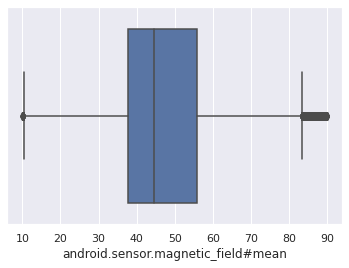

In [9]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.magnetic_field#mean']>90].index.tolist())
small_df=small_df.drop(small_df.loc[small_df['android.sensor.magnetic_field#mean']<10].index.tolist())
sns.boxplot(small_df['android.sensor.magnetic_field#mean'])

** Plotting **

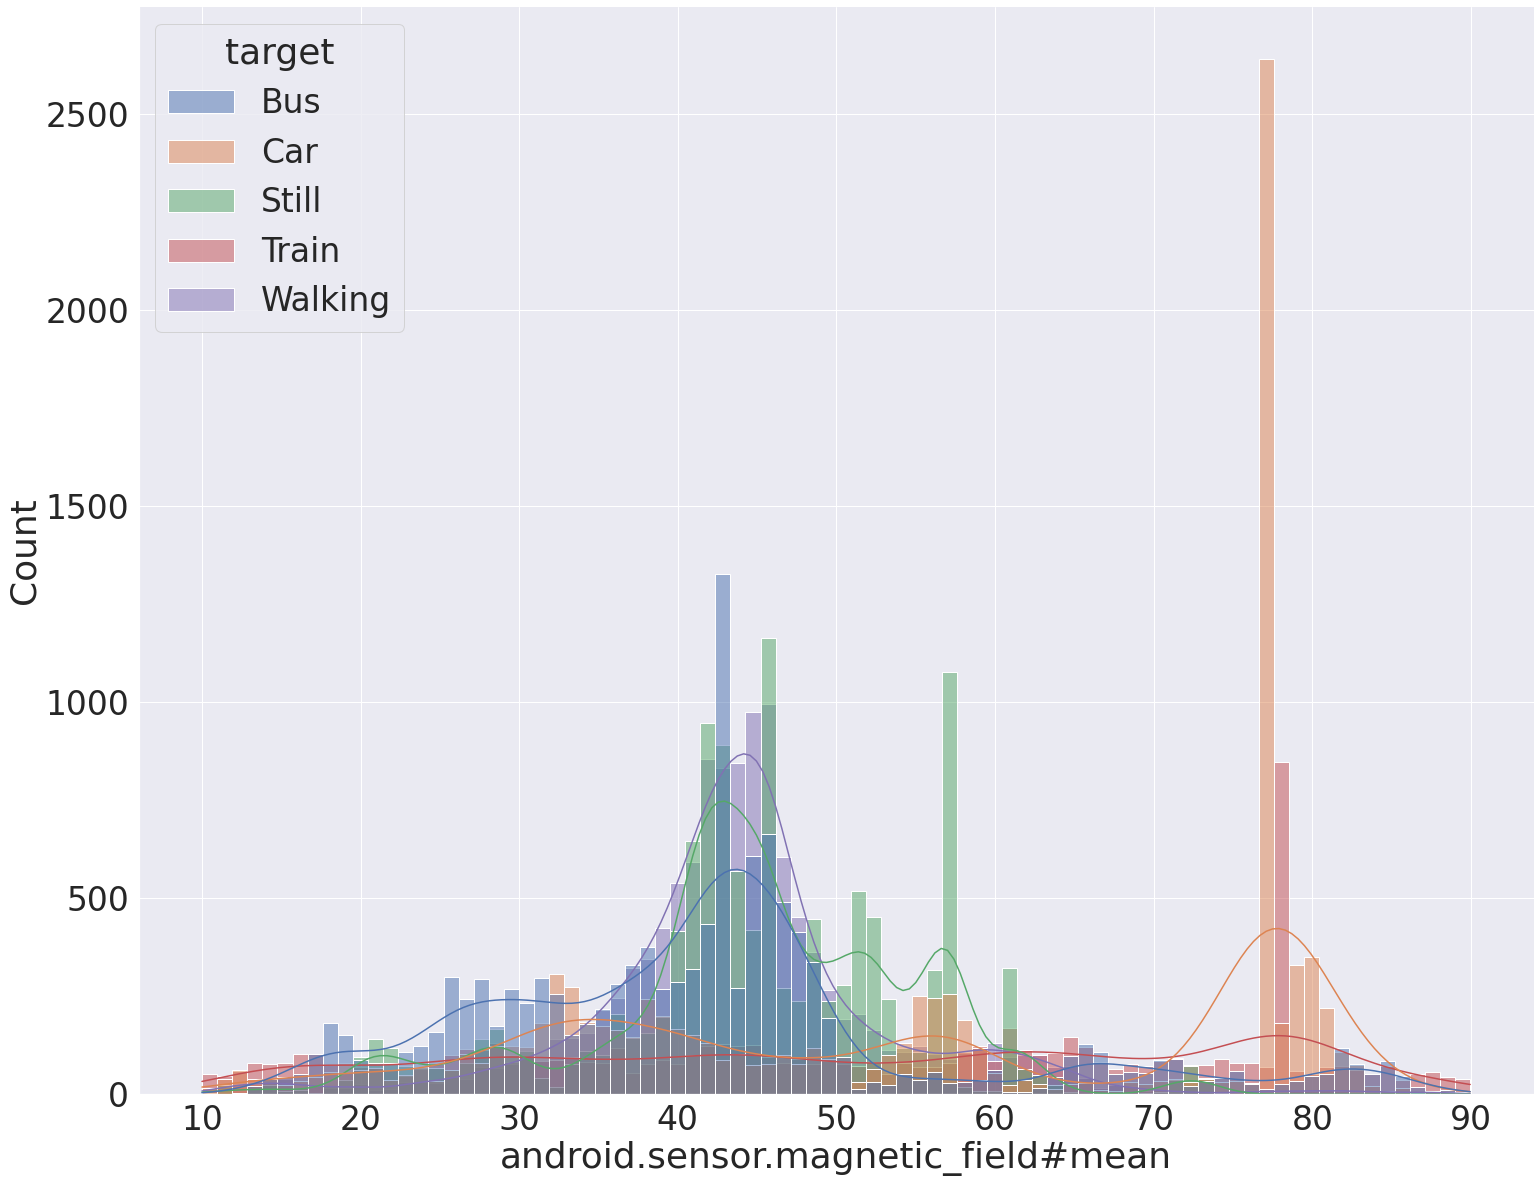

In [10]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.magnetic_field#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,500])
#plt.ylim([0,150])
sns.despine()

#### Rotation Vector

** Filling Null Data **

In [11]:
small_df['android.sensor.rotation_vector#mean'].isnull().sum()

7816

In [12]:
small_df['android.sensor.rotation_vector#mean'].fillna(small_df.groupby(['target'])['android.sensor.rotation_vector#mean'].transform('mean'), inplace=True)
small_df['android.sensor.rotation_vector#mean'].isnull().sum()

0

** Deleting Outliers**

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.rotation_vector#mean'>

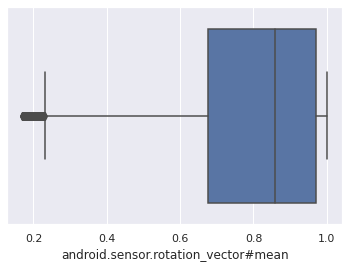

In [13]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.rotation_vector#mean']<0.17].index.tolist())
sns.boxplot(small_df['android.sensor.rotation_vector#mean'])

** Plotting **

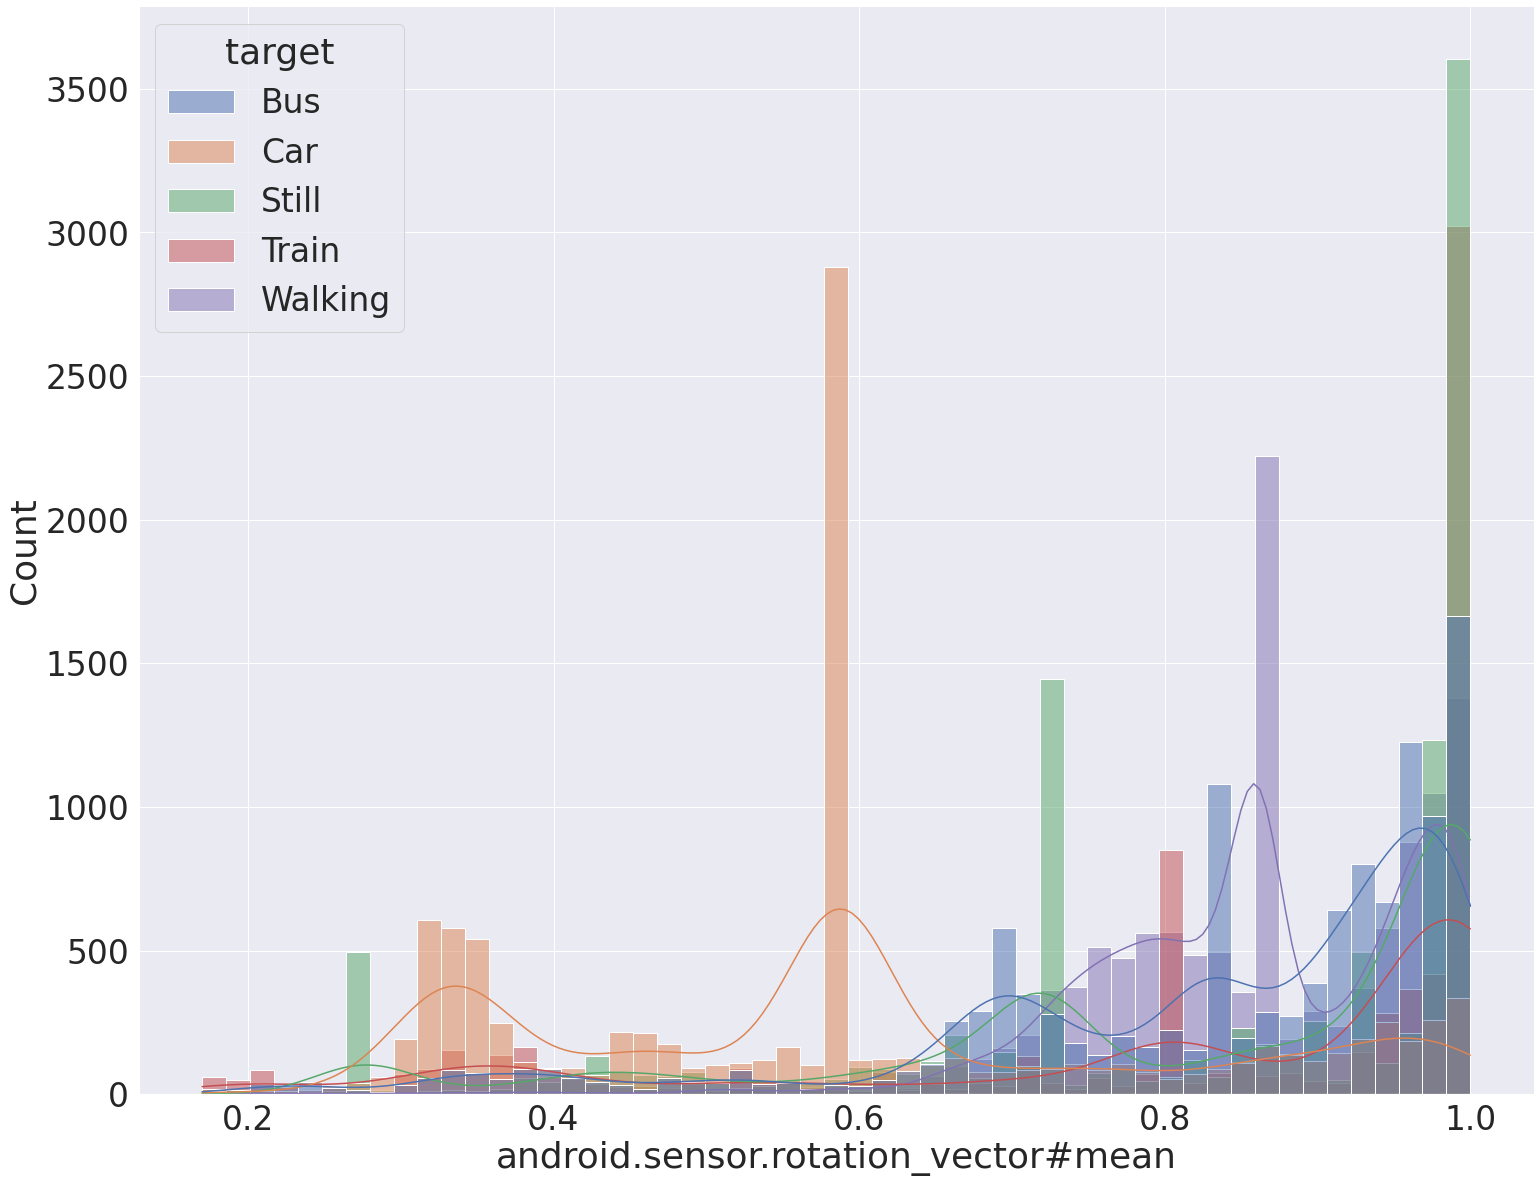

In [14]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.rotation_vector#mean'], kde=True,color="r",hue=small_df["target"])
sns.despine()

#### Gyroscope

** Filling Null Data **

In [15]:
small_df['android.sensor.gyroscope#mean'].isnull().sum()

7710

In [16]:
small_df['android.sensor.gyroscope#mean'].fillna(small_df.groupby(['target'])['android.sensor.gyroscope#mean'].transform('mean'), inplace=True)
small_df['android.sensor.gyroscope#mean'].isnull().sum()

0

** Deleting Outliers**

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.gyroscope#mean'>

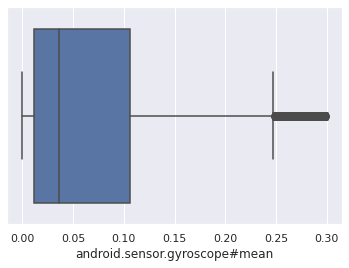

In [17]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.gyroscope#mean']>0.3].index.tolist())
sns.boxplot(small_df['android.sensor.gyroscope#mean'])

** Plotting **

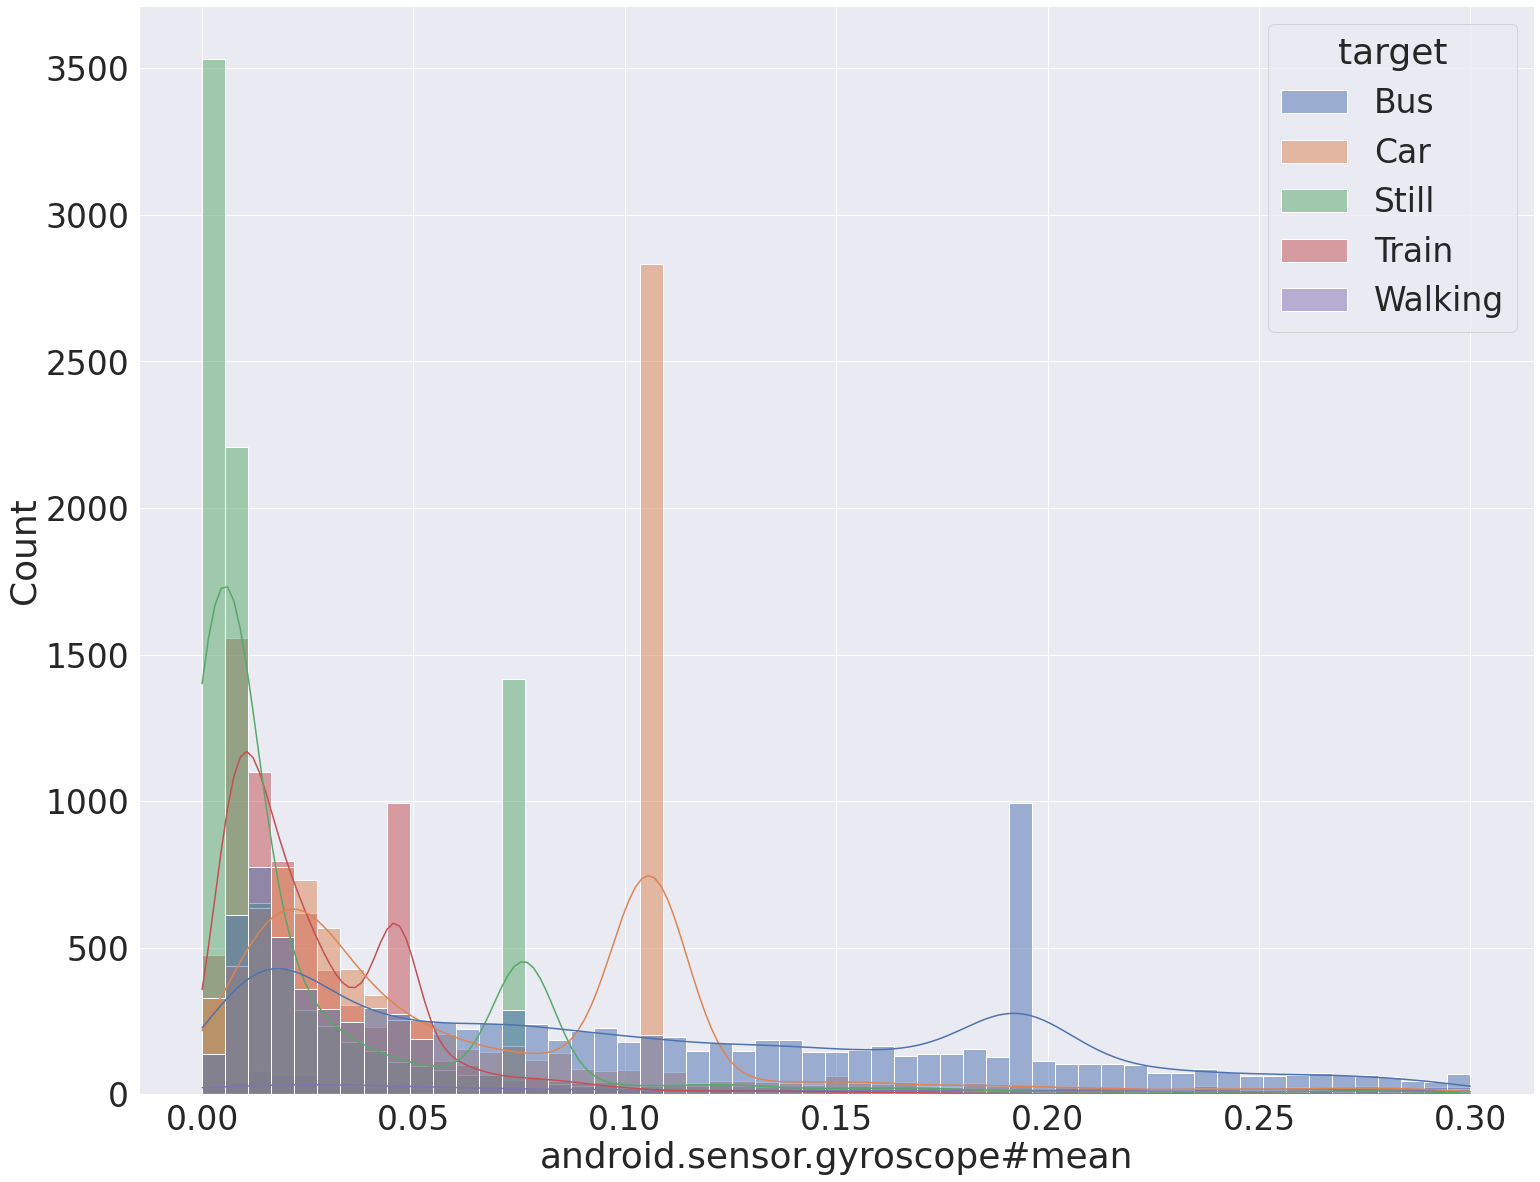

In [18]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.gyroscope#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,4])
#plt.ylim([0,500])
sns.despine()

#### Linear Acceleration

** Filling Null Data **

In [19]:
small_df['android.sensor.linear_acceleration#mean'].isnull().sum()

5190

In [20]:
small_df['android.sensor.linear_acceleration#mean'].fillna(small_df.groupby(['target'])['android.sensor.linear_acceleration#mean'].transform('mean'), inplace=True)
small_df['android.sensor.linear_acceleration#mean'].isnull().sum()

0

** Deleting Outliers**

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.linear_acceleration#mean'>

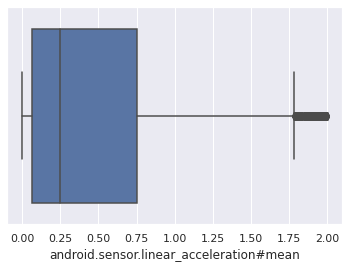

In [21]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.linear_acceleration#mean']>2].index.tolist())
sns.boxplot(small_df['android.sensor.linear_acceleration#mean'])

** Plotting **

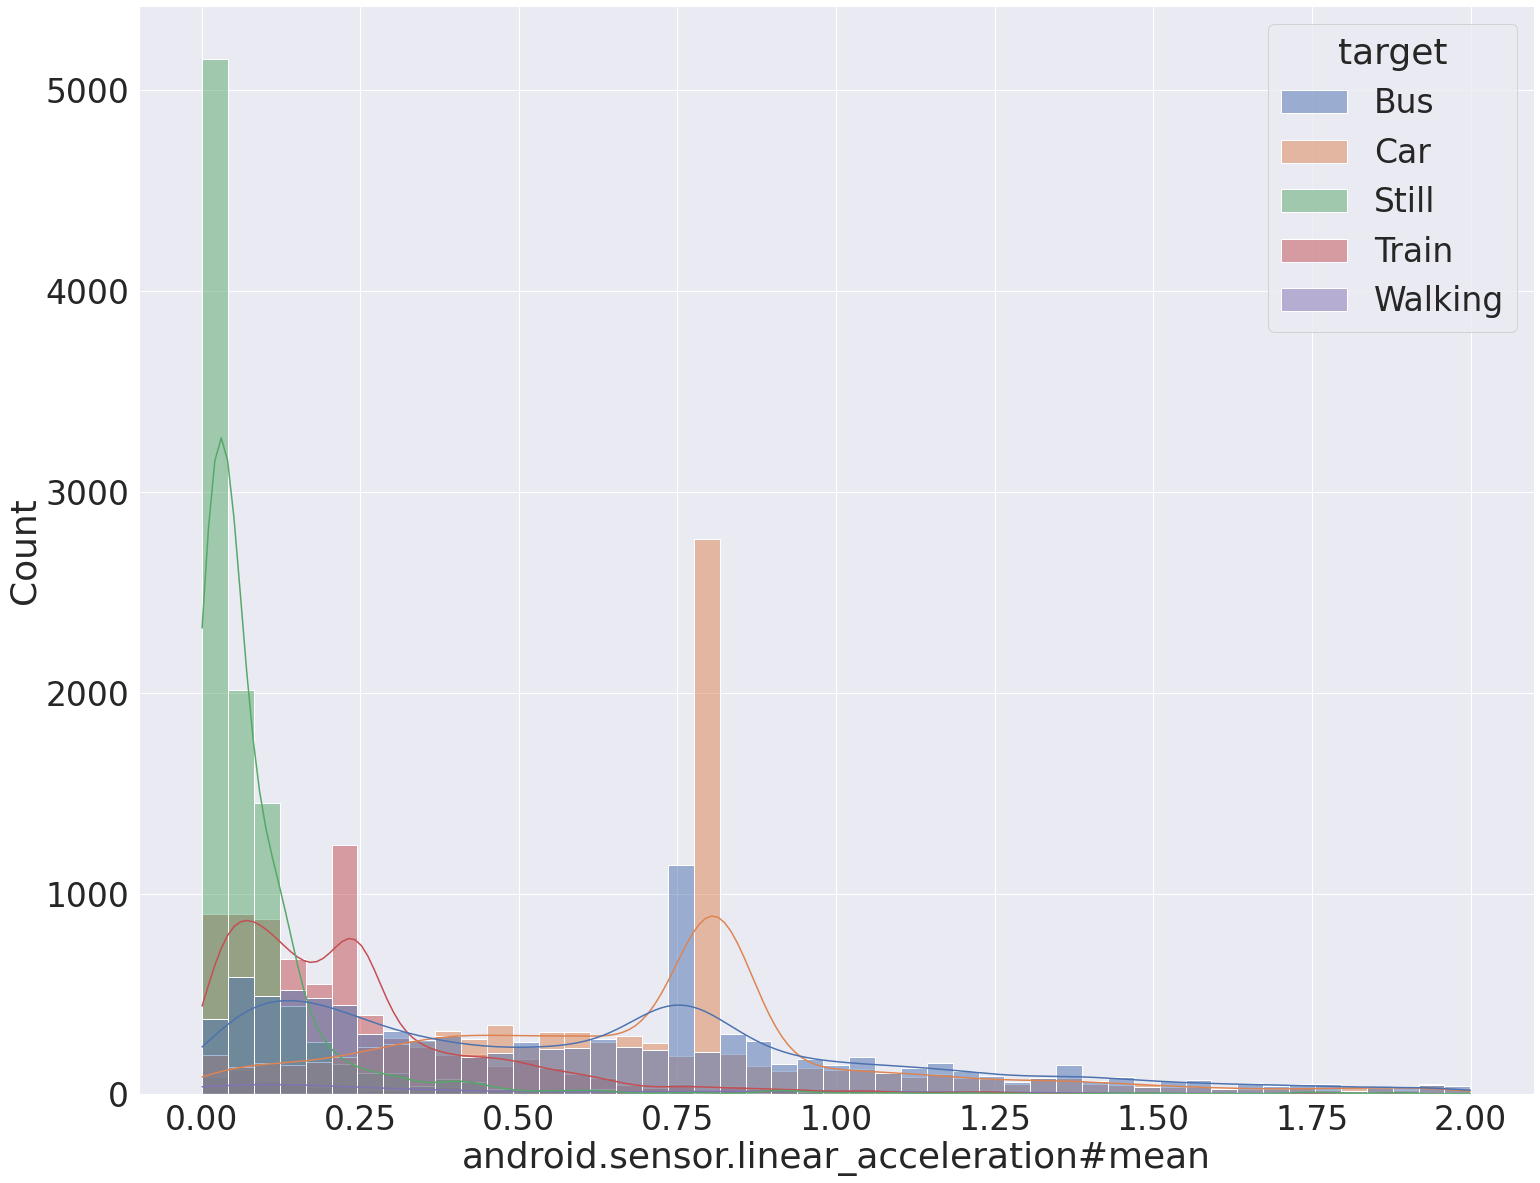

In [22]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.linear_acceleration#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,15])
#plt.ylim([0,2000])
sns.despine()

#### Accelerometer

In [23]:
small_df['android.sensor.accelerometer#std'].isnull().sum()

0

In [24]:
small_df['android.sensor.accelerometer#std'].fillna(small_df.groupby(['target'])['android.sensor.accelerometer#std'].transform('mean'), inplace=True)
small_df['android.sensor.accelerometer#std'].isnull().sum()

0

** Deleting Outliers**

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.accelerometer#mean'>

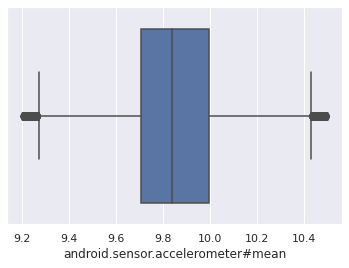

In [25]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.accelerometer#mean']>10.5].index.tolist())
small_df=small_df.drop(small_df.loc[small_df['android.sensor.accelerometer#mean']<9.2].index.tolist())
sns.boxplot(small_df['android.sensor.accelerometer#mean'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.accelerometer#min'>

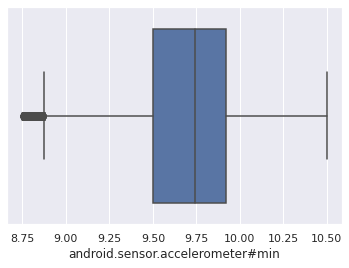

In [26]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.accelerometer#min']<8.75].index.tolist())
sns.boxplot(small_df['android.sensor.accelerometer#min'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.accelerometer#max'>

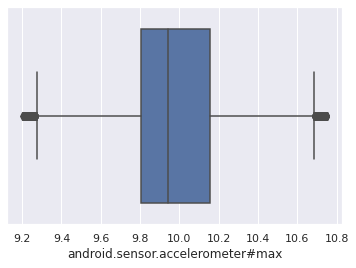

In [27]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.accelerometer#max']>10.75].index.tolist())
sns.boxplot(small_df['android.sensor.accelerometer#max'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.accelerometer#std'>

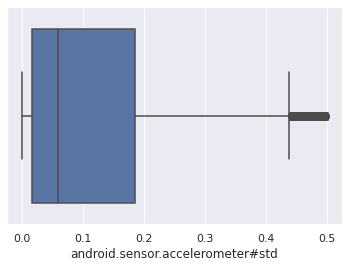

In [28]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.accelerometer#std']>0.5].index.tolist())
sns.boxplot(small_df['android.sensor.accelerometer#std'])

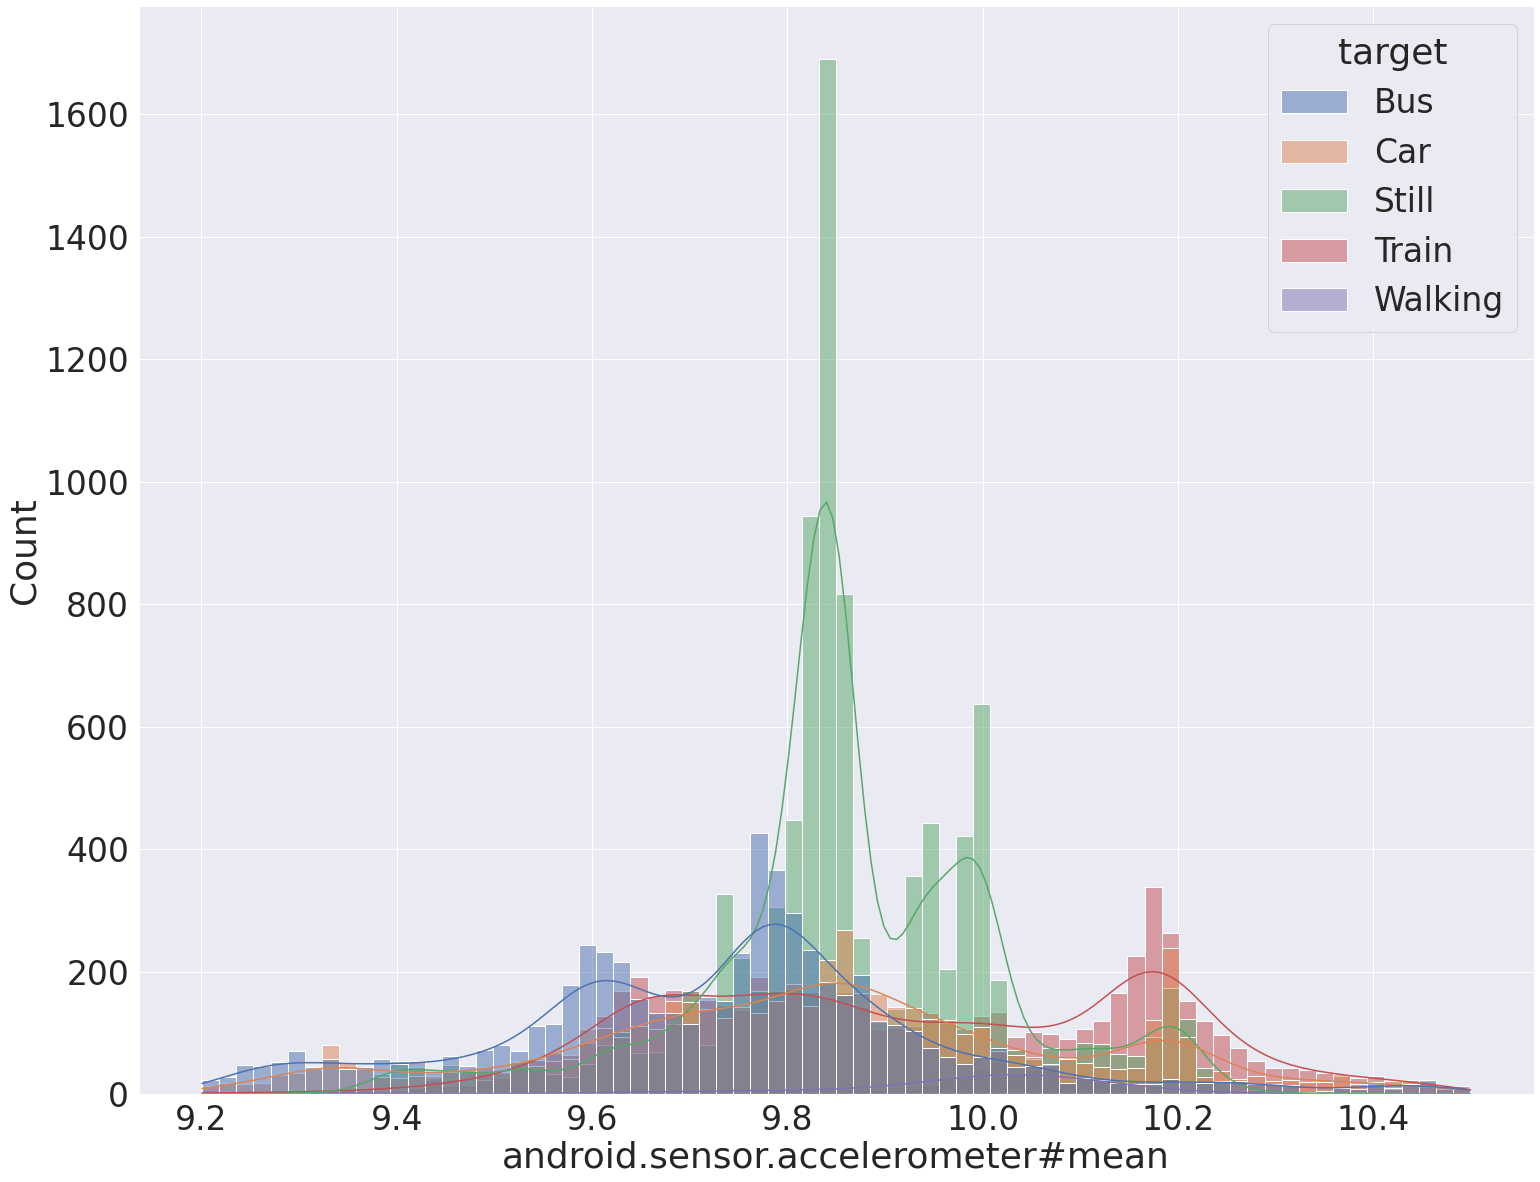

In [29]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.accelerometer#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([5,15])
#plt.ylim([0,500])
sns.despine()

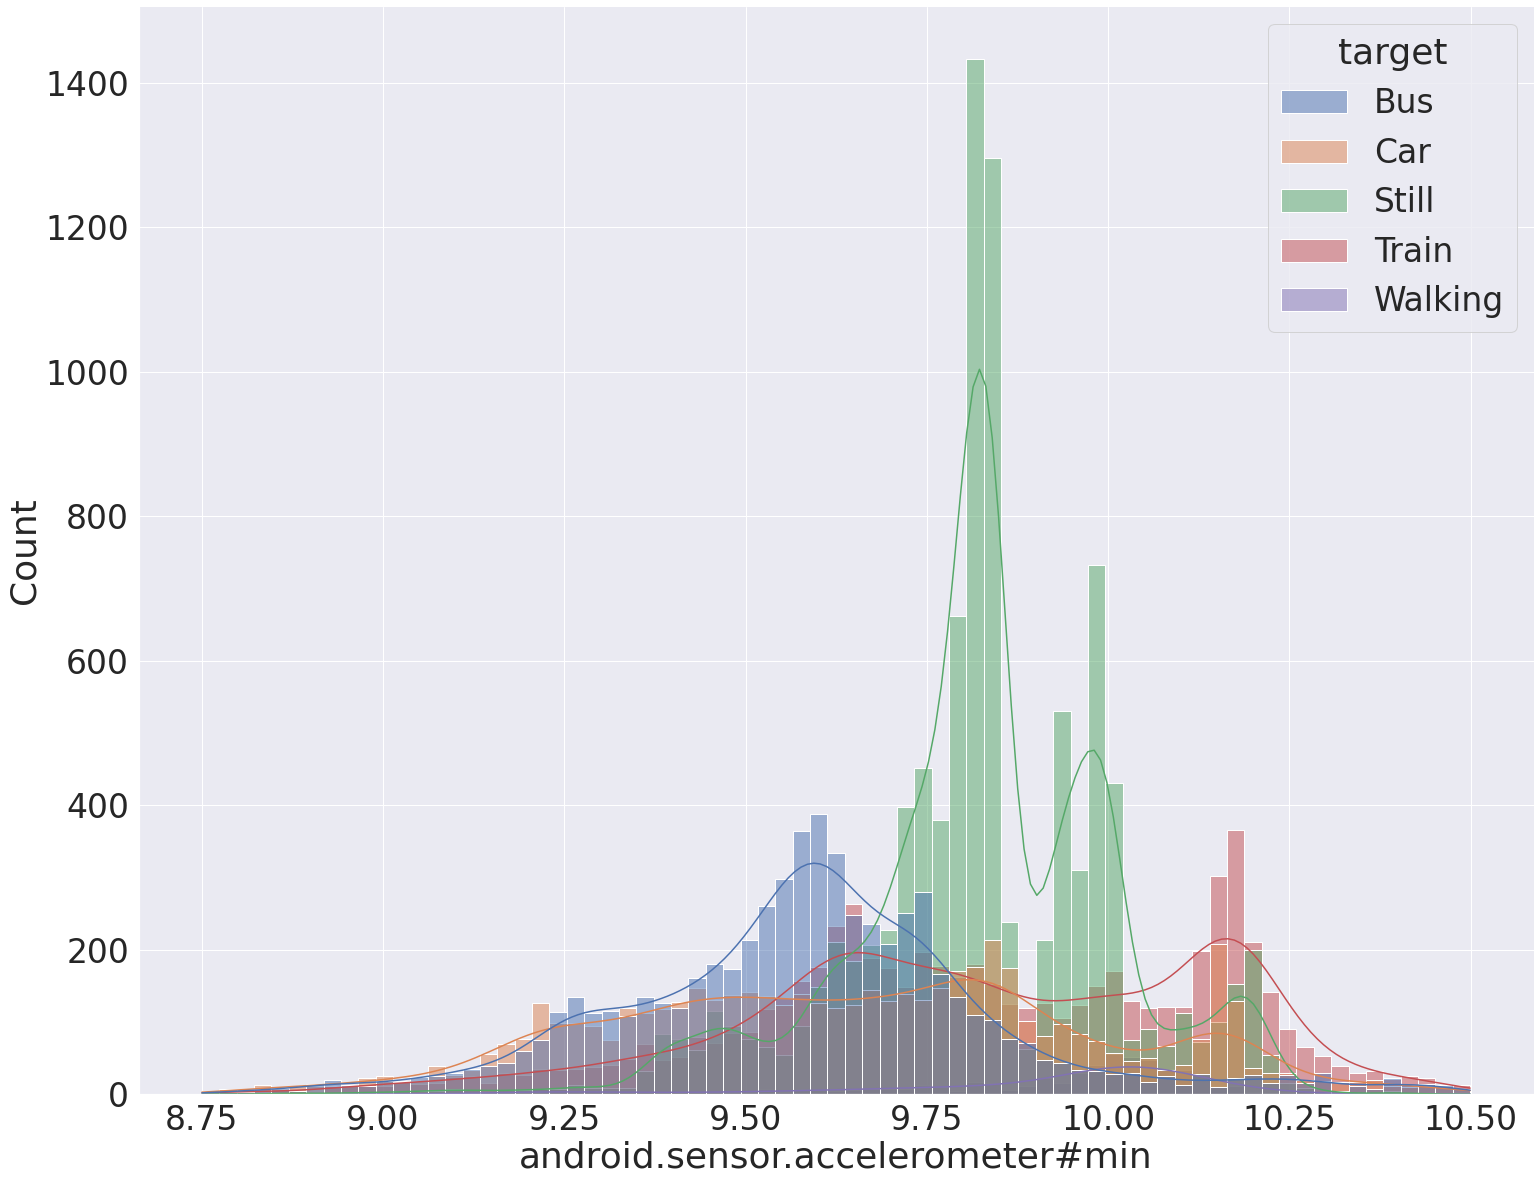

In [30]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.accelerometer#min'], kde=True,color="b",hue=small_df["target"])
#plt.xlim([0,20])
#plt.ylim([0,1000])
sns.despine()

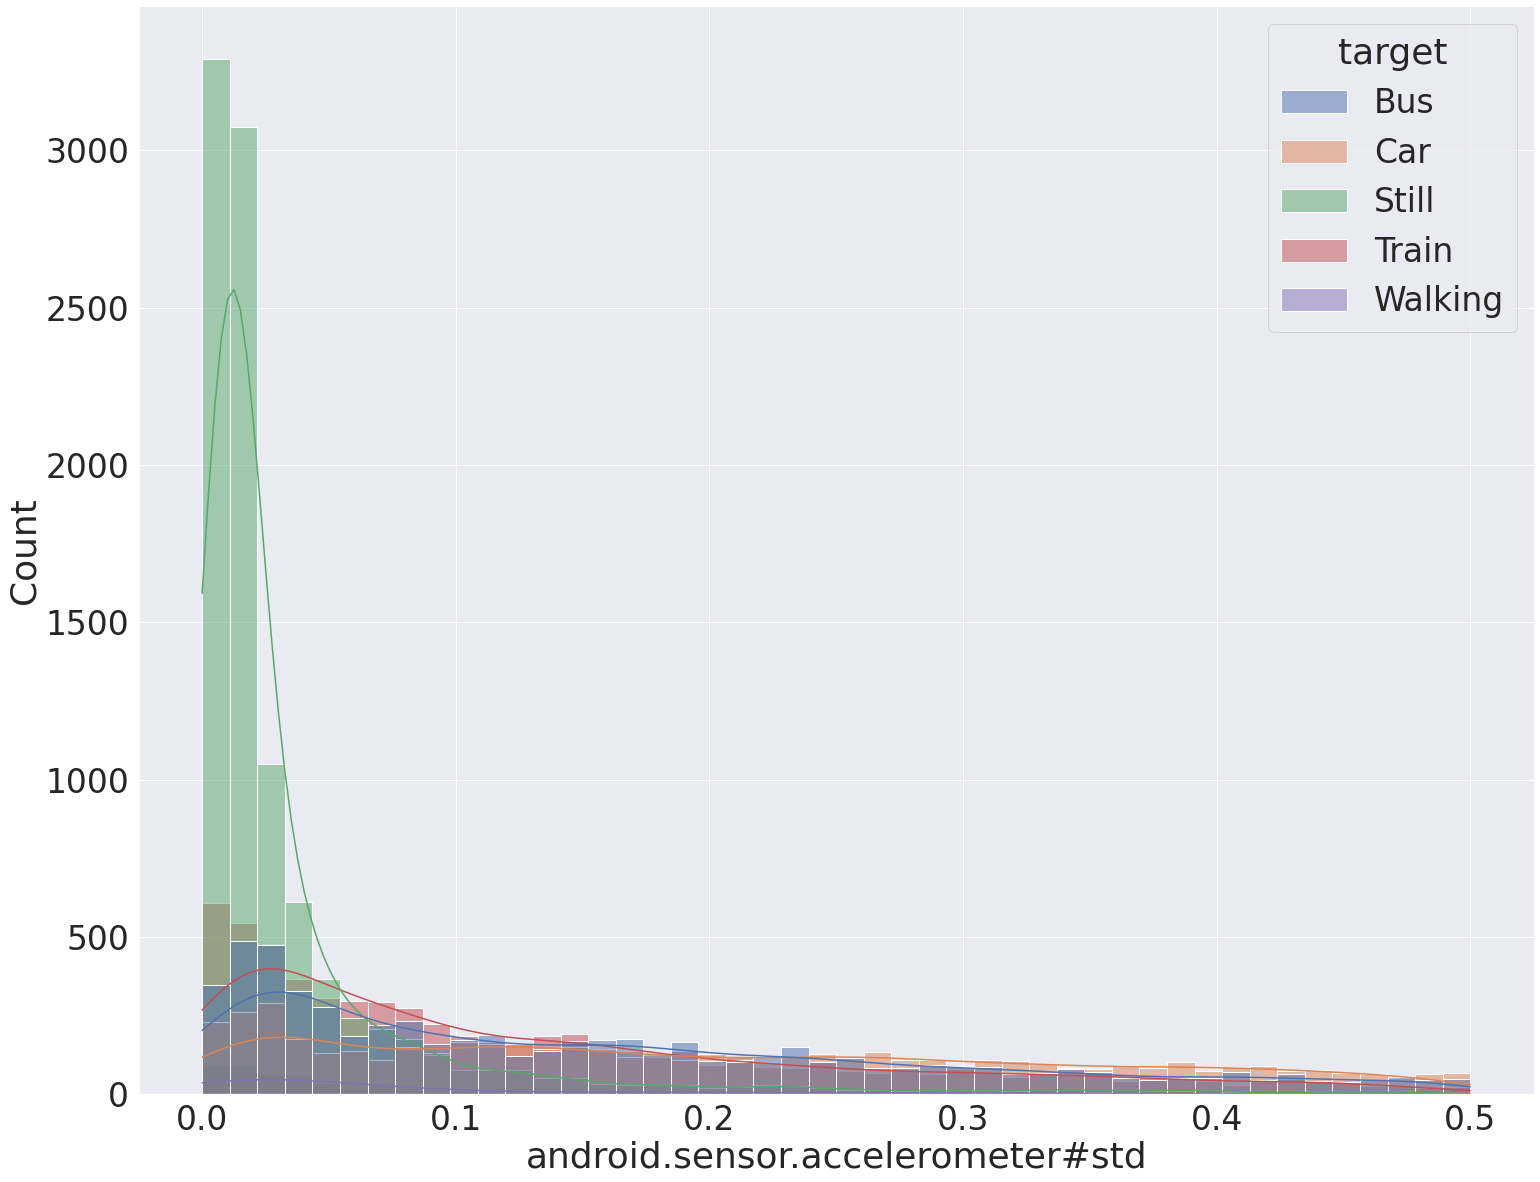

In [31]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.accelerometer#std'], kde=True,color="b",hue=small_df["target"])
#plt.xlim([0,5])
#plt.ylim([0,1000])
sns.despine()


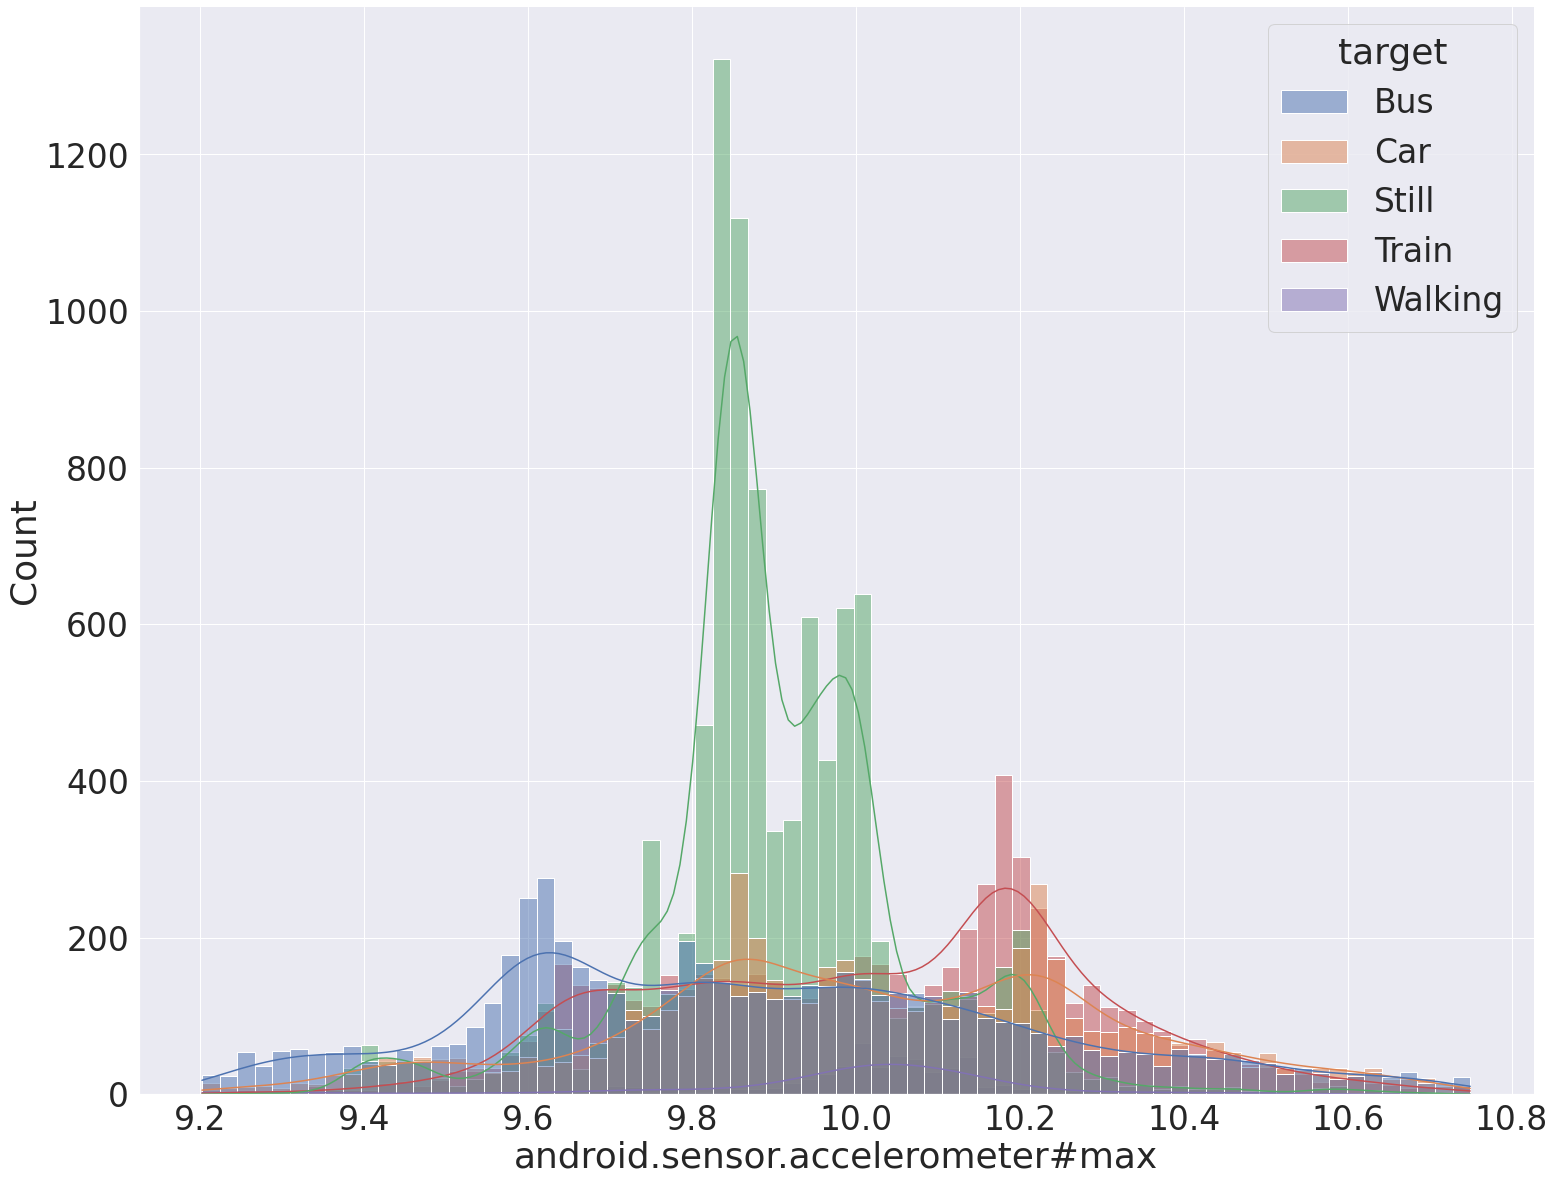

In [32]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.accelerometer#max'], kde=True,color="b",hue=small_df["target"])
#plt.xlim([0,20])
#plt.ylim([0,1000])
sns.despine()

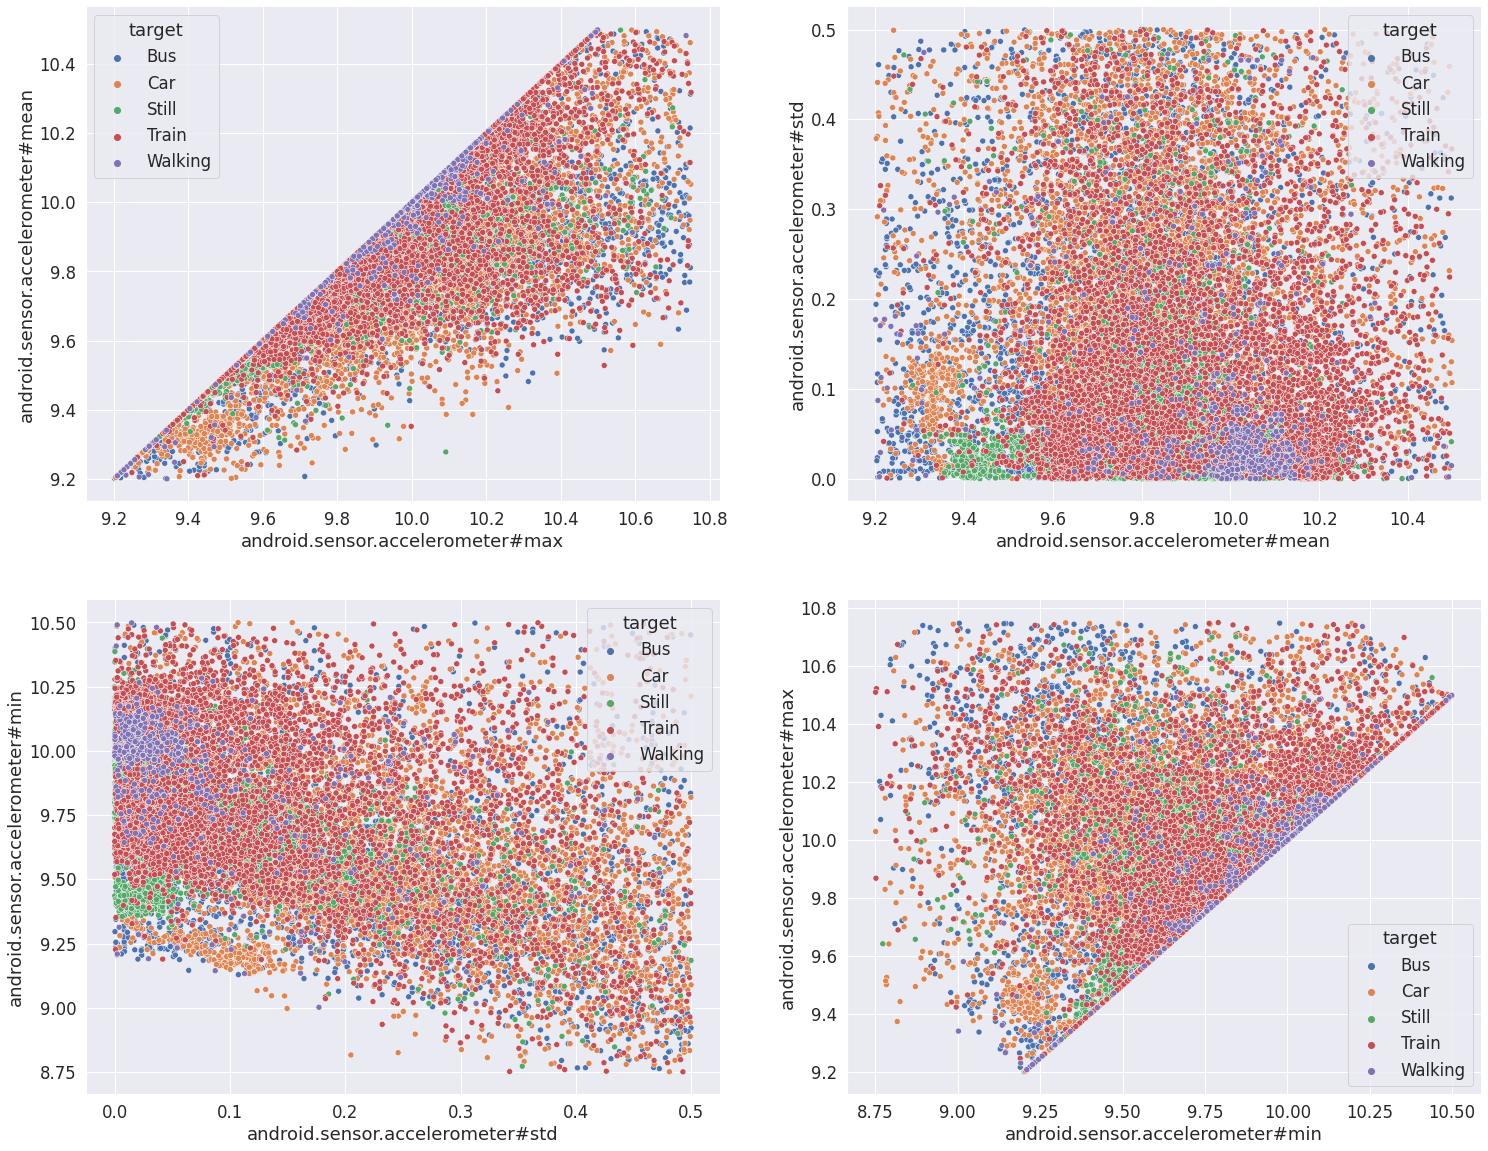

In [33]:
magnetic_field_list=['android.sensor.accelerometer#mean','android.sensor.accelerometer#std',
    'android.sensor.accelerometer#min','android.sensor.accelerometer#max']
plt.figure(figsize=(25, 20))
sns.set(font_scale= 1.5)
for i in range(len(magnetic_field_list)):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=ppdf[magnetic_field_list[i-1]],y=small_df[magnetic_field_list[i]],color="r",hue=small_df["target"])
    #plt.xlim(x_limite[i])
sns.despine()

#### Game Rotation

** Handling Null Data **

In [34]:
small_df['android.sensor.game_rotation_vector#mean'].isnull().sum()

4131

In [35]:
small_df['android.sensor.game_rotation_vector#mean'].fillna(small_df.groupby(['target'])['android.sensor.game_rotation_vector#mean'].transform('mean'), inplace=True)
small_df['android.sensor.game_rotation_vector#mean'].isnull().sum()

0

** Deleting Outliers **

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.game_rotation_vector#mean'>

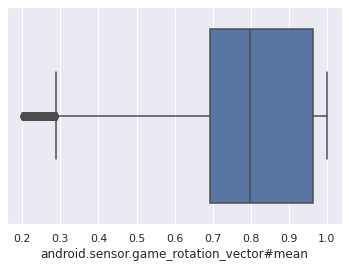

In [36]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))


small_df=small_df.drop(small_df.loc[small_df['android.sensor.game_rotation_vector#mean']<0.2].index.tolist())

sns.boxplot(small_df['android.sensor.game_rotation_vector#mean'])

** Plotting **

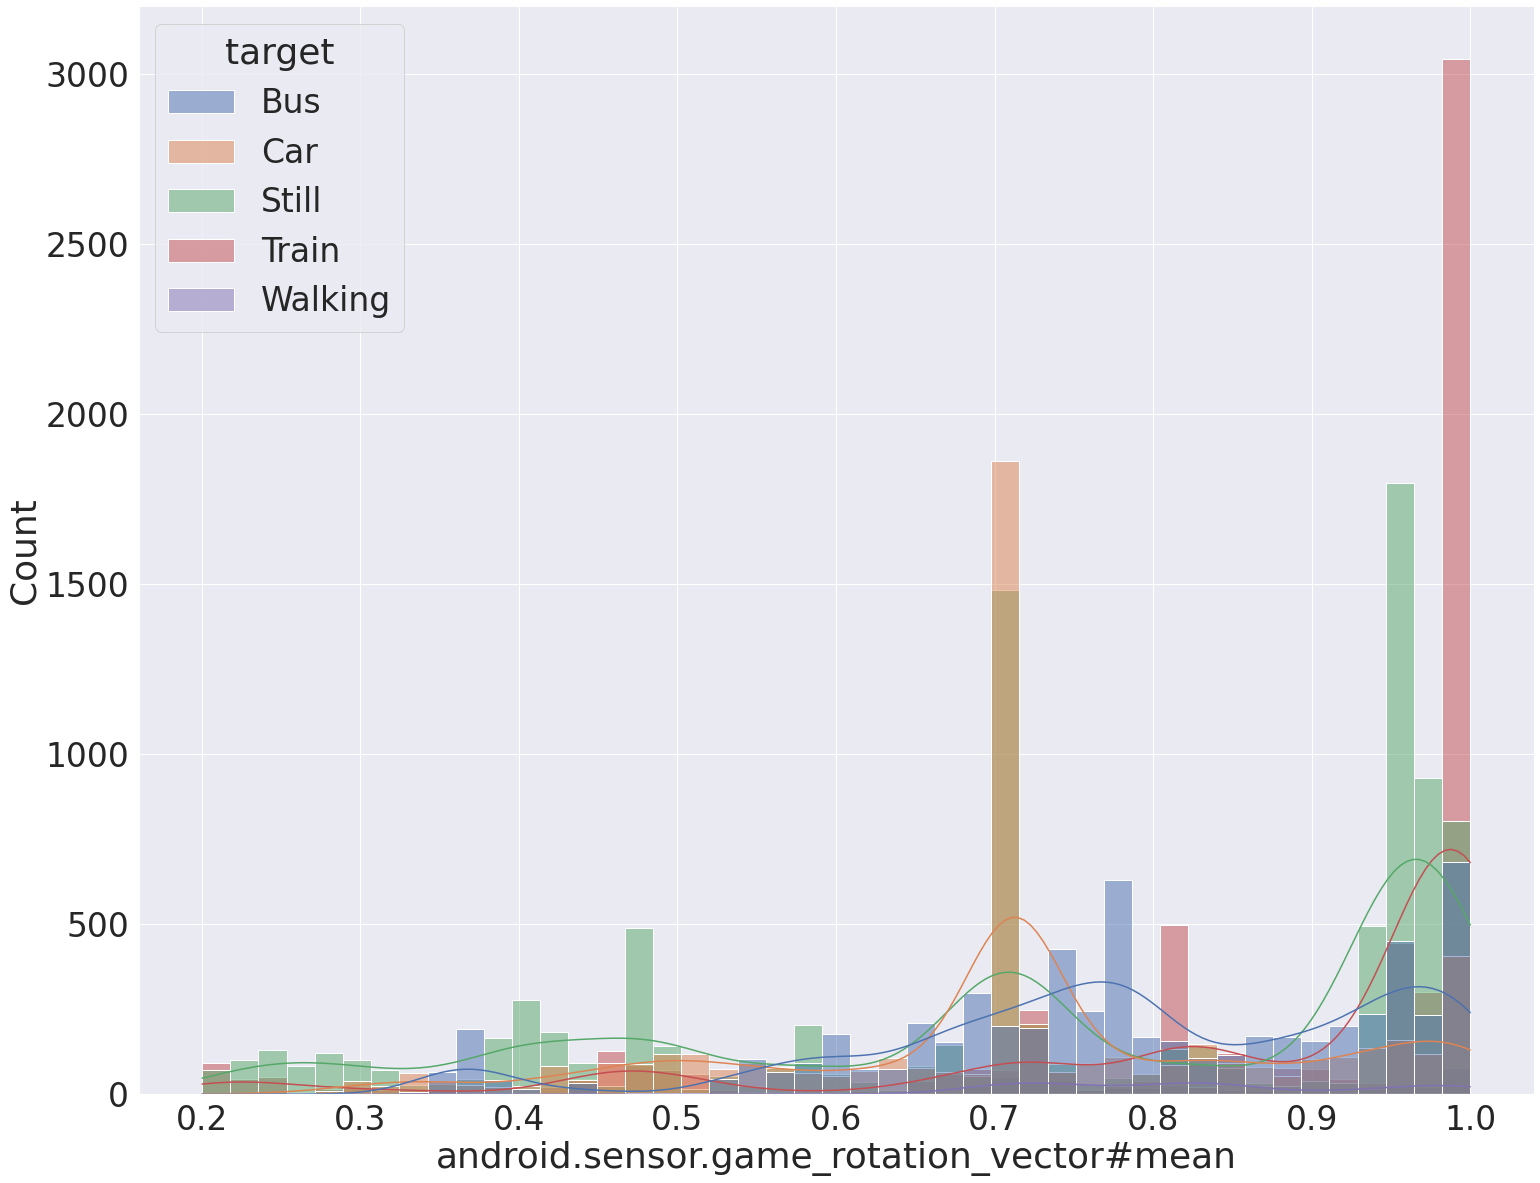

In [37]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.game_rotation_vector#mean'], kde=True,color="b",hue=small_df["target"])
#plt.xlim([0,20])
#plt.ylim([0,1000])
sns.despine()

#### Orientation

** Handling Null Data**

In [38]:
small_df['android.sensor.orientation#mean'].isnull().sum()

3464

In [39]:
small_df['android.sensor.orientation#mean'].fillna(small_df.groupby(['target'])['android.sensor.orientation#mean'].transform('mean'), inplace=True)
small_df['android.sensor.orientation#mean'].isnull().sum()

0

In [40]:
small_df['android.sensor.orientation#std'].isnull().sum()

4051

In [41]:
small_df['android.sensor.orientation#std'].fillna(small_df.groupby(['target'])['android.sensor.orientation#std'].transform('mean'), inplace=True)
small_df['android.sensor.orientation#std'].isnull().sum()

0

** Deleting Outliers **

In [42]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

sns.boxplot(small_df['android.sensor.orientation#mean'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.orientation#mean'>

In [43]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.orientation#std']>0.5].index.tolist())

sns.boxplot(small_df['android.sensor.orientation#std'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.orientation#std'>

** Plotting **

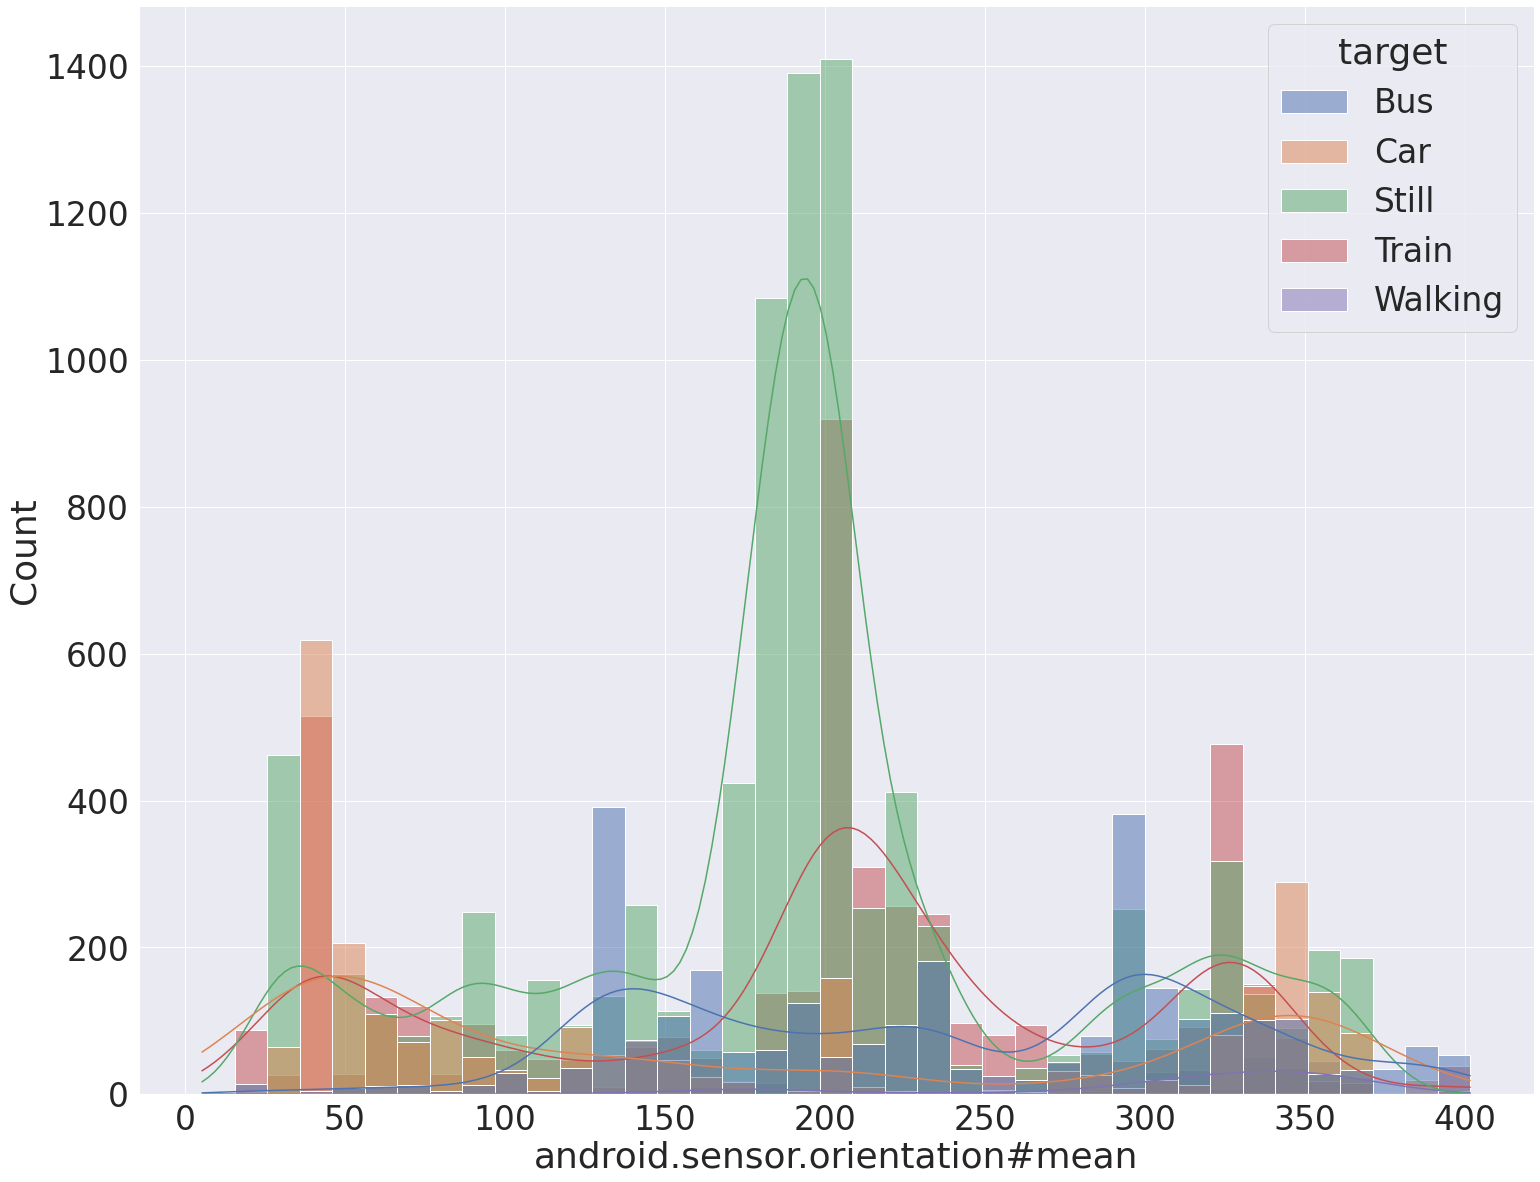

In [44]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.orientation#mean'], kde=True,color="b",hue=small_df["target"])
#plt.xlim([0,20])
#plt.ylim([0,1000])
sns.despine()

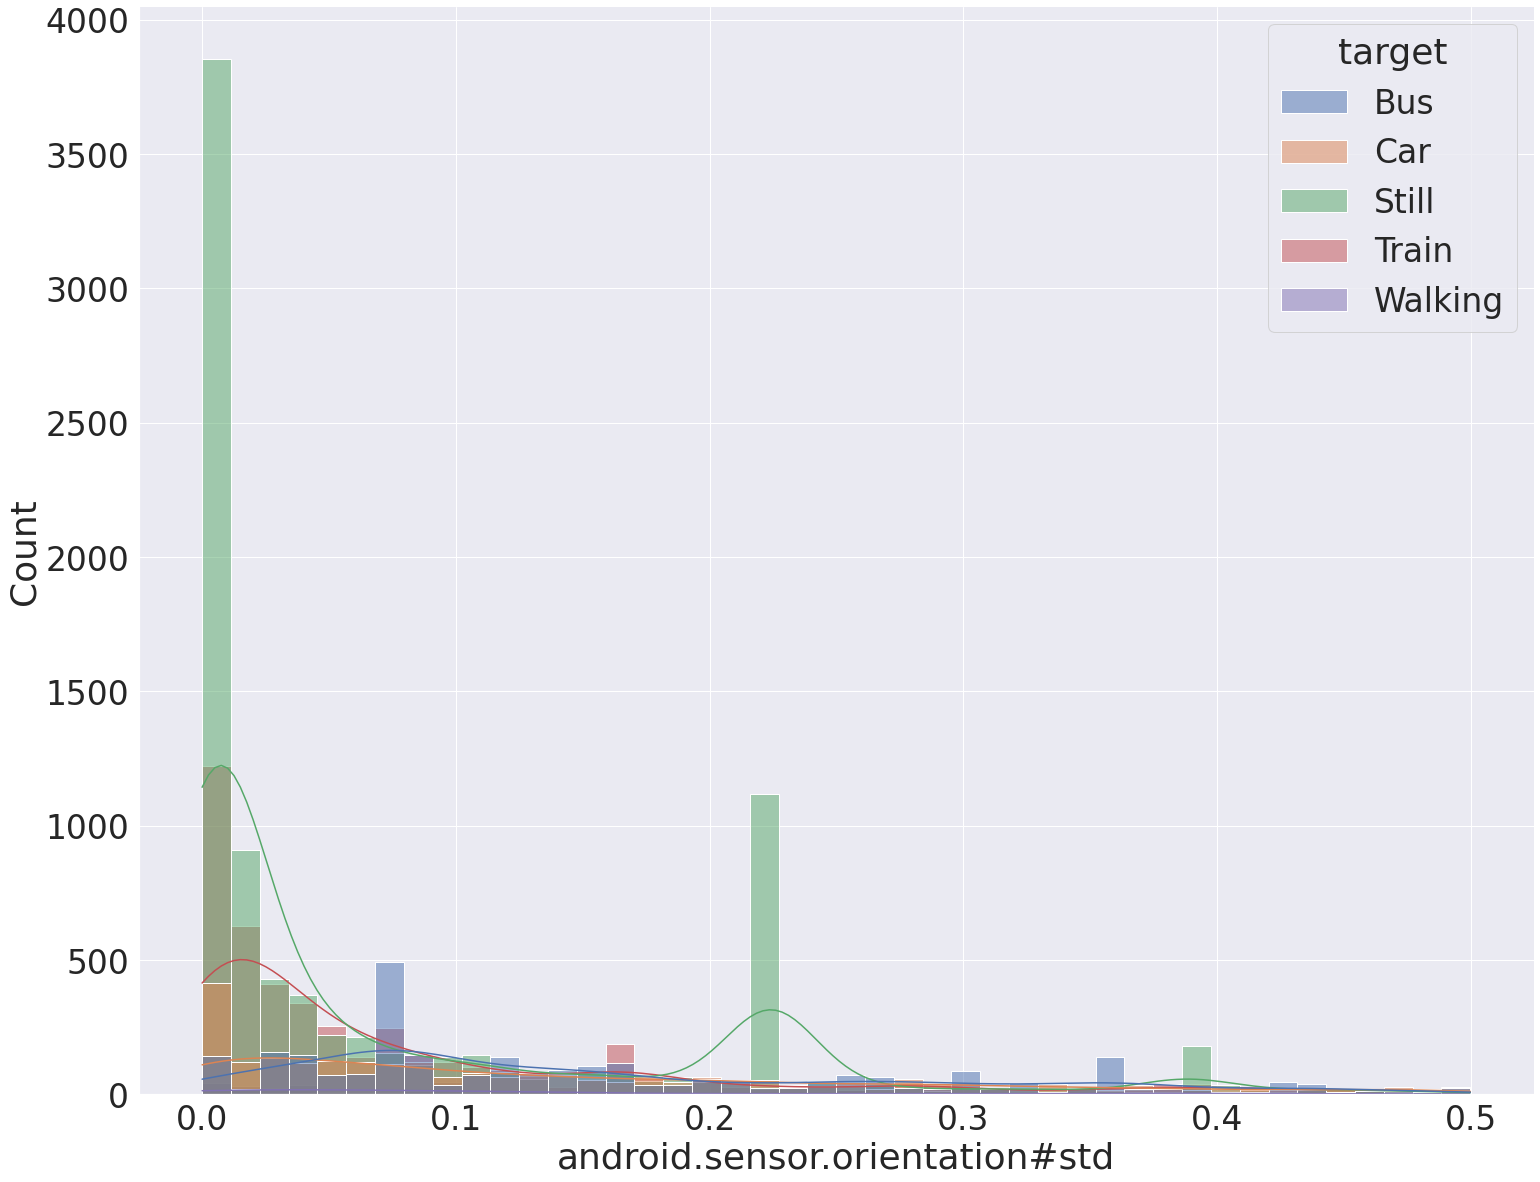

In [45]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.orientation#std'], kde=True,color="b",hue=small_df["target"])
#plt.xlim([0,20])
#plt.ylim([0,800])
sns.despine()

#### Creating Train and Test Dataset 

In [46]:
small_df.columns

Index(['time', 'android.sensor.accelerometer#mean',
       'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max',
       'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.gyroscope#mean',
       'android.sensor.linear_acceleration#mean',
       'android.sensor.magnetic_field#mean', 'android.sensor.orientation#mean',
       'android.sensor.orientation#std', 'android.sensor.rotation_vector#mean',
       'target', 'user'],
      dtype='object')

In [47]:

num_vars=['android.sensor.accelerometer#mean',
       'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max',
       'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.gyroscope#mean',
       'android.sensor.linear_acceleration#mean',
       'android.sensor.magnetic_field#mean', 'android.sensor.orientation#mean',
       'android.sensor.orientation#std', 'android.sensor.rotation_vector#mean']
cat_vars=[]

In [48]:
train_users = small_df[(small_df['user'] != "U12") & (small_df['user'] != "U9") & (small_df['user'] != "U2")]
test_user = small_df[(small_df['user'] == "U12") | (small_df['user'] == "U9")| (small_df['user'] == "U2")]


x_train=train_users[num_vars]
y_train=train_users["target"].map({"Bus":1, "Car":2, "Still": 3, "Train":4, "Walking": 5})
x_test=test_user[num_vars]
y_test=test_user["target"].map({"Bus":1, "Car":2, "Still": 3, "Train":4, "Walking": 5})
x_train.head()

android.sensor.accelerometer#mean  android.sensor.accelerometer#min  \
1971                           9.291114                          9.273088   
1972                           9.259818                          9.229602   
1973                           9.272496                          9.272496   
1974                           9.272496                          9.272496   
1975                           9.272496                          9.272496   

      android.sensor.accelerometer#max  android.sensor.accelerometer#std  \
1971                          9.309139                          0.025492   
1972                          9.290034                          0.042732   
1973                          9.272496                          0.042732   
1974                          9.272496                          0.042732   
1975                          9.272496                          0.042732   

      android.sensor.game_rotation_vector#mean  android.sensor.gyroscope#mean  \
1971                                  0.994643                       0.012140   
1972                                  0.994643                       0.012140   
1973                                  0.994643                       0.012140   
1974                                  0.994643                       0.017797   
1975                                  0.994643                       0.017797   

      android.sensor.linear_acceleration#mean  \
1971                                 0.636277   
1972                                 0.636277   
1973                                 0.636277   
1974                                 0.636277   
1975                                 0.636277   

      android.sensor.magnetic_field#mean  android.sensor.orientation#mean  \
1971                           58.732880                       150.510434   
1972                           58.847025                       150.510434   
1973                           58.283521                       149.288017   
1974                           59.673956                       149.288017   
1975                           59.673956                       149.778599   

      android.sensor.orientation#std  android.sensor.rotation_vector#mean  
1971                         0.09635                             0.960316  
1972                         0.09635                             0.960316  
1973                         0.09635                             0.960316  
1974                         0.09635                             0.958213  
1975                         0.09635                             0.958213

#### Handling Null Data

### Preprocessing

In [49]:
cat_4_tree_Models = pipeline.Pipeline(steps=[
    ('one hot', preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=45654))])


num_4_tree_Models=pipeline.Pipeline(steps=[
    (("quantile transformer",preprocessing.QuantileTransformer(n_quantiles=100, random_state=0,
    output_distribution='normal')))])



tree_prepro=compose.ColumnTransformer(transformers=[
    ("categorical",cat_4_tree_Models,cat_vars),
    ("numerical",num_4_tree_Models,num_vars)]) 

tree_prepro

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one hot',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=45654))]),
                                 []),
                                ('numerical',
                                 Pipeline(steps=[('quantile transformer',
                                                  QuantileTransformer(n_quantiles=100,
                                                                      output_distribution='normal',
                                                                      random_state=0))]),
                                 ['android.sensor.accelerometer#mean',
                                  'android.sensor.accelerometer#min',
                                  'android.sensor.accelerometer#max',
                                  'android.sensor.accelerometer#std',
                                  'android.sensor.game_rotation_vector#mean',
                                  'android.sensor.gyroscope#mean',
                                  'android.sensor.linear_acceleration#mean',
                                  'android.sensor.magnetic_field#mean',
                                  'android.sensor.orientation#mean',
                                  'android.sensor.orientation#std',
                                  'android.sensor.rotation_vector#mean'])])

### Machine Learning Tree Model Selection

In [50]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

In [51]:
tree_pipelines={
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Skl GBM": GradientBoostingClassifier(),
    "Skl HistGBM": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier() 
    }

tree_pipelines = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_pipelines.items()}

tree_pipelines["XGBoost"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=45654))]),
                                                  []),
                                                 ('numerical',
                                                  Pipeline(steps=[('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=100,
                                                                                       output_distribution='normal',
                                                                                       random_state=0))]),
                                                  ['android.sensor.acceler...
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, reg_alpha=None,
                               reg_lambda=None, scale_pos_weight=None,
                               subsample=None, tree_method=None,
                               validate_parameters=None, verbosity=None))])

In [52]:

x_train2, x_val, y_train2, y_val = model_selection.train_test_split(x_train,y_train, test_size=0.2,stratify = y_train, random_state=4)




results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in tree_pipelines.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    model.fit(x_train2,y_train2)
    # GET PREDICTIONS USING x_val
    pred = model.predict(x_val)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              





results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

1:	learn: 0.9058987	total: 75.9ms	remaining: 37.9s
2:	learn: 0.8287594	total: 89.1ms	remaining: 29.6s
3:	learn: 0.7701106	total: 102ms	remaining: 25.5s
4:	learn: 0.7103411	total: 116ms	remaining: 23.1s
5:	learn: 0.6634144	total: 129ms	remaining: 21.4s
6:	learn: 0.6170123	total: 143ms	remaining: 20.2s
7:	learn: 0.5819419	total: 156ms	remaining: 19.3s
8:	learn: 0.5506257	total: 191ms	remaining: 21s
9:	learn: 0.5232772	total: 206ms	remaining: 20.4s
10:	learn: 0.4925013	total: 226ms	remaining: 20.3s
11:	learn: 0.4669031	total: 247ms	remaining: 20.3s
12:	learn: 0.4447209	total: 264ms	remaining: 20s
13:	learn: 0.4251859	total: 279ms	remaining: 19.6s
14:	learn: 0.4062566	total: 294ms	remaining: 19.3s
15:	learn: 0.3890010	total: 307ms	remaining: 18.9s
16:	learn: 0.3736714	total: 321ms	remaining: 18.6s
17:	learn: 0.3609794	total: 334ms	remaining: 18.2s
18:	learn: 0.3477164	total: 347ms	remaining: 17.9s
19:	learn: 0.3348115	total: 361ms	remaining: 17.7s
20:	learn: 0.3226300	total: 396ms	remainin

In [53]:

from sklearn.model_selection import cross_val_predict

skf = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)




results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})





for model_name, model in tree_pipelines.items():
    start_time = time.time()


        
    # TRAIN AND GET PREDICTIONS USING cross_val_predict() and x,y
    pred = cross_val_predict(model, x_train,y_train, cv=skf)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_train, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_train, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')


1:	learn: 0.9012948	total: 28.5ms	remaining: 14.2s
2:	learn: 0.8240723	total: 42.9ms	remaining: 14.3s
3:	learn: 0.7605653	total: 59.3ms	remaining: 14.8s
4:	learn: 0.6993158	total: 74.2ms	remaining: 14.8s
5:	learn: 0.6546080	total: 97ms	remaining: 16.1s
6:	learn: 0.6059290	total: 112ms	remaining: 15.9s
7:	learn: 0.5710738	total: 142ms	remaining: 17.6s
8:	learn: 0.5386775	total: 158ms	remaining: 17.4s
9:	learn: 0.5072773	total: 172ms	remaining: 17s
10:	learn: 0.4780728	total: 186ms	remaining: 16.7s
11:	learn: 0.4562269	total: 201ms	remaining: 16.6s
12:	learn: 0.4342829	total: 216ms	remaining: 16.4s
13:	learn: 0.4154450	total: 252ms	remaining: 17.7s
14:	learn: 0.3979842	total: 266ms	remaining: 17.5s
15:	learn: 0.3820991	total: 282ms	remaining: 17.3s
16:	learn: 0.3672476	total: 296ms	remaining: 17.1s
17:	learn: 0.3538670	total: 310ms	remaining: 16.9s
18:	learn: 0.3410857	total: 324ms	remaining: 16.8s
19:	learn: 0.3259340	total: 339ms	remaining: 16.6s
20:	learn: 0.3148655	total: 354ms	remai

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dd66c499-8cd9-44d2-87d5-ecc9c3ddd387' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>